In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
treino = pd.read_csv('titanic_train.csv')
teste = pd.read_csv('titanic_test.csv')

In [3]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


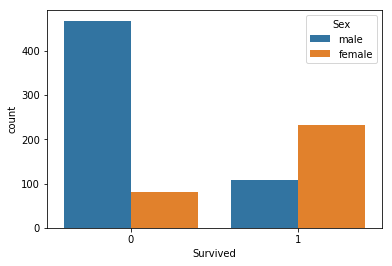

In [4]:
sns.countplot(x='Survived', data=treino, hue='Sex')

No gráfico acima nos mostra a distribuição por sexo dos sobreviventes e não sobreviventes do naufragio do Titanic.

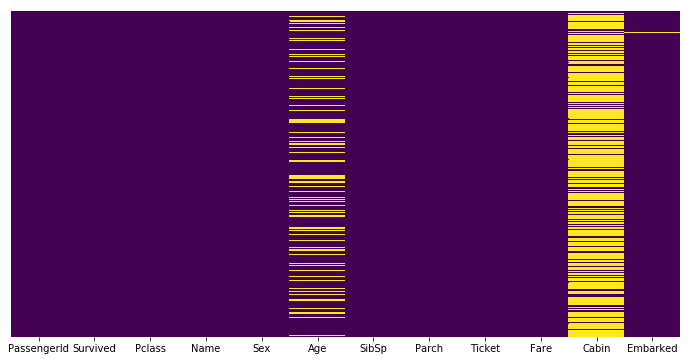

In [5]:
plt.figure(figsize=(12,6))
sns.heatmap(treino.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Gráfico para mostrar os valores nulos no dataset.

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


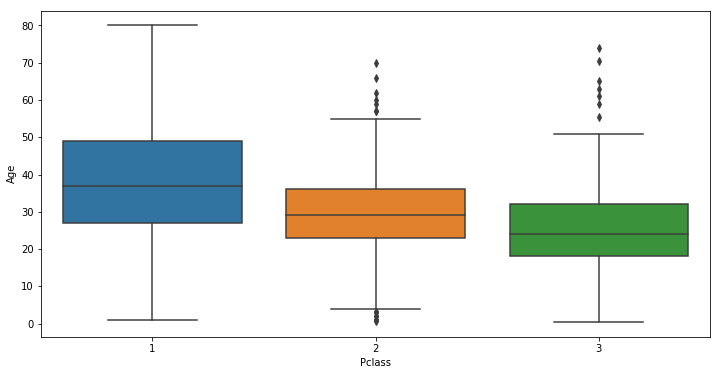

In [6]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass',y='Age', data=treino)

Esse boxplot nos mostra a média de idade de cada passageiro pela sua classe social,
Pclass = 1 média de idade = 37,
Pclass = 2 média de idade = 29 e
Pclass = 3 média de idade = 24,
esses valores serão importantes para preencher os valores missing no dataset.

In [7]:
# Preencher valores faltantes no dataset
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [8]:
treino['Age'] = treino[['Age', 'Pclass']].apply(impute_age, axis=1)

In [9]:
treino.drop('Cabin',axis=1, inplace=True)

In [10]:
treino.dropna(inplace=True)

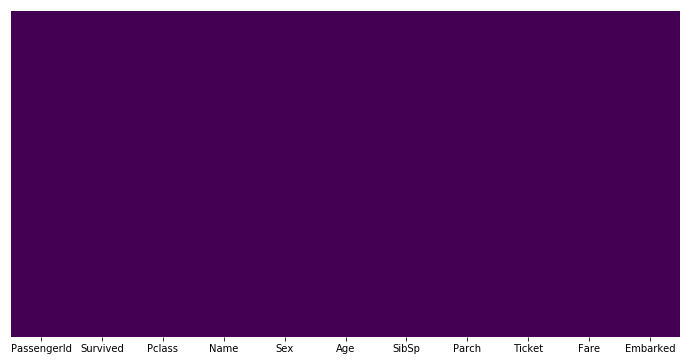

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(treino.isnull(), yticklabels=False, cbar=False, cmap='viridis')

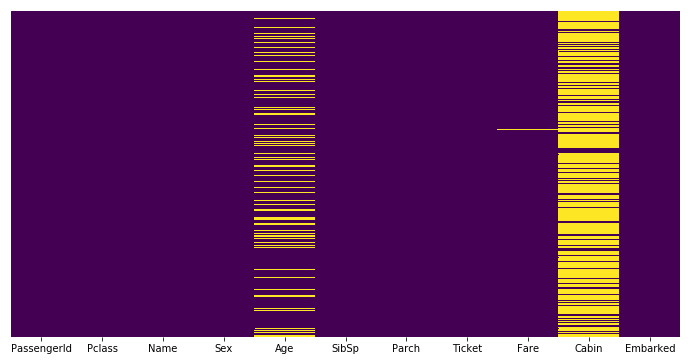

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(teste.isnull(), yticklabels=False, cbar=False, cmap='viridis')

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


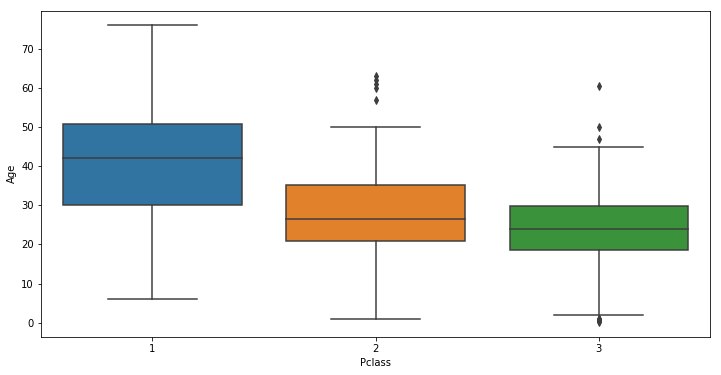

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass', y='Age', data=teste)

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 41

        elif Pclass == 2:
            return 25

        else:
            return 23

    else:
        return Age

In [15]:
teste.drop('Cabin', axis=1, inplace=True)

In [16]:
teste.dropna(inplace=True)

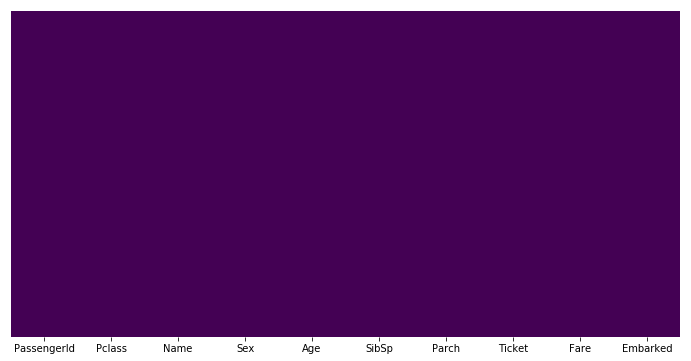

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(teste.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [18]:
print(treino.shape)
print(teste.shape)

(889, 11)
(331, 10)


In [19]:
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [20]:
treino.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [21]:
sex = pd.get_dummies(treino['Sex'], drop_first=True)

In [22]:
embarked = pd.get_dummies(treino['Embarked'], drop_first=True)

In [23]:
treino.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [24]:
treino = pd.concat([treino, sex, embarked], axis=1)

Teste

In [25]:
teste.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [26]:
sex = pd.get_dummies(teste['Sex'], drop_first=True)

In [27]:
embarked = pd.get_dummies(teste['Embarked'], drop_first=True)

In [28]:
teste.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [29]:
teste = pd.concat([teste, sex, embarked], axis=1)

Train_Test_Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(treino.drop('Survived',axis=1), treino['Survived'], test_size=0.30,random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
predictions = logmodel.predict(X_test)

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.82      0.86      0.84       167
          1       0.75      0.69      0.72       100

avg / total       0.80      0.80      0.80       267

